# Importing libraries and setting up data

In [53]:
import pandas as pd
import math
import seaborn as sns
import statistics as stat

filepath_drivers = "/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/drivers.csv"
filepath_pitstops = "/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/pit_stops.csv"


drivers = pd.read_csv(filepath_drivers)
pitstops = pd.read_csv(filepath_pitstops)
circuits= pd.read_csv(r'/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/circuits.csv')
races = pd.read_csv(r'/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/races.csv')
qualifying = pd.read_csv(r'/Users/abdullahkhan/MathMethodsforDA/MathematicalMethods/Assignment3/F1DataSet/qualifying.csv')


# Dataframe configurations

In [2]:
pd.set_option('precision', 2)
pd.set_option('display.max_rows', 10000)

pitstops.shape

(7638, 7)

# Pitstop Analysis

### Cleaning Data

In [3]:
drivers_good = drivers[drivers.code != '\\N'] # Removing all records where driver code is \N
drivers_good = drivers_good[drivers_good.number != '\\N'] # Removing all records where driver number is \N
drivers_good.shape

(45, 9)

#### Merging Drivers & Pitstops data frames to perform descriptive analysis of pitstop times

In [4]:
drivers_pitstops = pd.merge(drivers_good, pitstops, how='inner', on = 'driverId') # Merge the drivers and pitstops data frames
drivers_pitstops = drivers_pitstops[drivers_pitstops.milliseconds < 170000] # Filter out extreme values - incorrect data from 2017 Azerbaijan Grand Prix
drivers_pitstops['milliseconds'] /= 1000 # Convert milliseconds to seconds
drivers_pitstops.columns = ['driverID', 'driverRef', 'Number', 'Code' , 'Forename' , 'Surname', 'DOB', 'Nationality', 'URL', 'raceId', 'Stop', 'Lap', 'Time', 'Duration', 'Seconds'] # Rename columns
top_pitstops = drivers_pitstops.sort_values(by=['Seconds'], ascending=True) #Sort by fastest pitstop time
top_pitstops_final = top_pitstops.head(30) # Capture 30 fastest pitstop times in Formula 1 History

In [5]:
fastest_fore = [x for x in top_pitstops_final.Forename] # Creating list of top 30 fastest drivers Forename for calculating mode 
fastest_sur = [x for x in top_pitstops_final.Surname] # Creating list of top 30 fastest drivers Surname for calculating mode
mode_times = drivers_pitstops[drivers_pitstops.driverRef == stat.mode(top_pitstops_final.driverRef)] # Separating most recurring driver in top 30 to separate data frame - this will help in calculating mean

### Descriptive analysis of pitstop times (incluing 30 fastest) in Formula 1

#### Measures of central tendency

In [6]:
print(f'Out of the {len(top_pitstops_final.index)} fastest pitstop times in Formula 1 history the most recurring driver with fastest pitstop times is {stat.mode(fastest_fore)} {stat.mode(fastest_sur)} ({stat.mode(top_pitstops_final.Nationality)}) with an average time of {stat.mean(mode_times.Seconds):.2f} seconds in his career and a fastest time of {top_pitstops_final.Seconds.min():.2f} seconds')


Out of the 30 fastest pitstop times in Formula 1 history the most recurring driver with fastest pitstop times is Pastor Maldonado (Venezuelan) with an average time of 24.59 seconds in his career and a fastest time of 12.90 seconds


In [7]:
print(f'The median time for pitstops in Formula 1 is {stat.median(drivers_pitstops.Seconds):.2f} seconds and the average time is {stat.mean(drivers_pitstops.Seconds):.2f} seconds')

The median time for pitstops in Formula 1 is 23.43 seconds and the average time is 24.47 seconds


#### Measures of variable tendency

In [8]:
print(f'The standard deviation of all pitstop times is {stat.pstdev(drivers_pitstops.Seconds):.2f} and the pvariance is {stat.pvariance(drivers_pitstops.Seconds):.2f} illustrating the spread of F1 Pitstop Times')

The standard deviation of all pitstop times is 5.47 and the pvariance is 29.96 illustrating the spread of F1 Pitstop Times


#### Charts

#### Scatter plot analysis of 30 fastest pitstops in Formula 1 History

In [9]:
%matplotlib inline

Text(0.5, 1.0, '30 Fastest Pitstops in Formula 1')

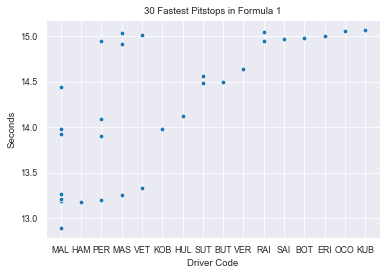

In [10]:
sns.set_style('darkgrid')
sns.set_context('paper')
scatterchart = sns.scatterplot(x = top_pitstops_final.Code, y=top_pitstops_final.Seconds) # Plotting pit stop times against driver code for 30 fastest pitstops
scatterchart.set_xlabel('Driver Code')
scatterchart.set_title(f'{len(top_pitstops_final.index)} Fastest Pitstops in Formula 1')

#### Distribution Plot of all F1 Pitstops

Text(0.5, 1.0, 'Distribution Plot of all F1 pitstops')

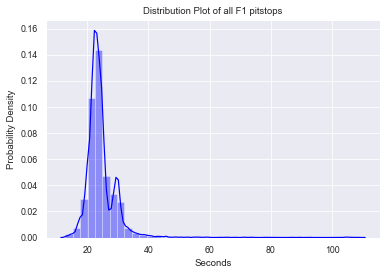

In [11]:
axes = sns.distplot(drivers_pitstops.Seconds, bins= 40, color = 'blue')
axes.set_ylabel('Probability Density')
axes.set_title('Distribution Plot of all F1 pitstops')


# Driver Analysis

## Data Cleansing: 
#### Replace \N in circuits, drivers with -9999
#### Replace \N in qualifying with 0

In [12]:
gcircuits = circuits.replace("\\N",-9999)
gdrivers = drivers.replace("\\N",-9999)
gqualifying = qualifying.replace("\\N",0)
graces=races.replace("\\N",-9999)

#### Merging Data Frames

In [21]:
rc=pd.merge(graces,gcircuits, on = 'circuitId')
qrc=pd.merge(gqualifying,rc, on = 'raceId')
dqrc=pd.merge(gdrivers,qrc, on = 'driverId')
dqrc.shape

(8474, 32)

## Descriptive Analysis

#### Drivers who started at pole position at the United States Grand Prix

In [50]:
us_pole = dqrc[(dqrc.position == 1) & (dqrc.name_x =='United States Grand Prix')]
us_pole.columns
us_pole = us_pole.drop(['code', 'dob', 'nationality', 'url', 'qualifyId', 'constructorId', 'number_y', 'position', 'q1', 'q2', 'q3', 'year', 'round', 'name_x', 'date', 'time', 'url_x', 'circuitRef', 'lat','lng','alt','url_y'], 1)
us_pole


,driverId,driverRef,number_x,forename,surname,raceId,circuitId,name_y,location,country
24,1,hamilton,44,Lewis,Hamilton,42,19,Indianapolis Motor Speedway,Indianapolis,USA
184,1,hamilton,44,Lewis,Hamilton,965,69,Circuit of the Americas,Austin,USA
204,1,hamilton,44,Lewis,Hamilton,985,69,Circuit of the Americas,Austin,USA
225,1,hamilton,44,Lewis,Hamilton,1006,69,Circuit of the Americas,Austin,USA
559,3,rosberg,6,Nico,Rosberg,916,69,Circuit of the Americas,Austin,USA
577,3,rosberg,6,Nico,Rosberg,942,69,Circuit of the Americas,Austin,USA
1175,8,raikkonen,7,Kimi,Räikkönen,122,19,Indianapolis Motor Speedway,Indianapolis,USA
2136,15,trulli,-9999,Jarno,Trulli,79,19,Indianapolis Motor Speedway,Indianapolis,USA
2980,20,vettel,5,Sebastian,Vettel,878,69,Circuit of the Americas,Austin,USA
2999,20,vettel,5,Sebastian,Vettel,898,69,Circuit of the Americas,Austin,USA


#### Visualization for drivers who raced in 70th Anniversary Grand Prix

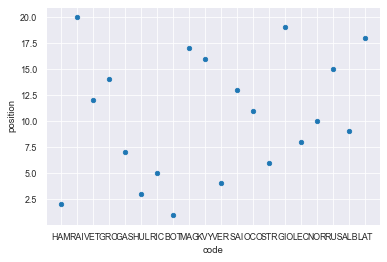

In [54]:
listchart = dqrc[(dqrc.name_x == '70th Anniversary Grand Prix')]
barchart = listchart.plot(x='code', y='position', kind ='scatter')

# Summary

In [ ]:
Visualization for drivers who raced in 70th Anniversary Grand Prix